<a href="https://colab.research.google.com/github/ashraj98/nn-4parity/blob/master/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 1**
## Ashwin Rajgopal



Start off by importing needed libraries. Numpy for matrix math, math for math functions, random for sample order shuffling, tabulate to output the data, and pyplot to plot the data.

In [1]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tabulate import tabulate

Here, the 16 samples are explicitly defined with their expected output. The samples are reshaped in to matrix to allow for easy matrix math through numpy when training and testing.

A bias constant is also declared to allow for matrix math to be done with the bias weights.

In [2]:
samples = [
  (np.array([0,0,0,0]).reshape(1,4),1),
  (np.array([0,0,0,1]).reshape(1,4),0),
  (np.array([0,0,1,0]).reshape(1,4),1),
  (np.array([0,0,1,1]).reshape(1,4),0),
  (np.array([0,1,0,0]).reshape(1,4),1),
  (np.array([0,1,1,0]).reshape(1,4),0),
  (np.array([0,1,0,1]).reshape(1,4),0),
  (np.array([0,1,1,1]).reshape(1,4),1),
  (np.array([1,0,0,0]).reshape(1,4),1),
  (np.array([1,0,0,1]).reshape(1,4),0),
  (np.array([1,0,1,0]).reshape(1,4),0),
  (np.array([1,0,1,1]).reshape(1,4),1),
  (np.array([1,1,0,0]).reshape(1,4),0),
  (np.array([1,1,0,1]).reshape(1,4),1),
  (np.array([1,1,1,0]).reshape(1,4),1),
  (np.array([1,1,1,1]).reshape(1,4),0),
]

bias = np.array([1]).reshape(1,1)

Here the sigmoid and sigmoid prime functions are defined. These functions are vectorized using numpy to allow for both functions to be applied to elements in a matrix at once, as opposed to using a loop, which is slower than using numpy vectorized functions.

In [3]:
def sigmoid(v):
  return 1 / (1 + np.exp(-v))

def sigmoid_prime(v):
  s = sigmoid(v)
  return s * (1 - s)

This function determines the error for a set of weights and biases based on the samples defined above. The function iterates through each sample, does the forward propogation using the supplied weights, getting an output from 0 to 1 due to the output layer being a sigmoid. The output is then classed to 0 to 1 using .5 as the threshold.

In [4]:
def epoch_error(w1, w2, b1, b2):
  errors = 0
  for x, d in samples:
    y_raw = sigmoid(sigmoid(x.dot(w1) + b1).dot(w2) + b2)
    y = 0 if y_raw < .5 else 1
    errors += abs(d - y)
  return errors / len(samples)

The train function updates the weights, give a learning rate and a momemtum term. A momentum term of 0 essentially means no momentum, and it is used as the default.

`w1` and `b1` correspond to weights and biases for the hidden layer, and `w2` and `b2` are the weights for the output layer.

Using a while loop to check when the error threshold has been reached, the actual training is run. Before each iteration, the order of the samples is randomly shuffled, and then the function uses that order to access the samples. For each sample, the forward propogation is run, the output is determined, and then back propogation is run to update the weights.

For momentum, the previous delta is saved and multiplied by the alpha term, and added during the weight update.

The function returns the number of epochs needed to meet the error threshold.

In [5]:
def train(w1, b1, w2, b2, lr = .05, a = 0,):
  error = 1
  epochs = 0
  order = list(range(len(samples)))
  while error > .05:
    random.shuffle(order)
    prev_d_w1 = prev_d_b1 = prev_d_w2 = prev_d_b2 = 0
    for idx in order:
      x, d = samples[idx]
      vj = x.dot(w1) + b1 # (1, 4)
      yj = sigmoid(vj) # (1, 4)
      vk = yj.dot(w2) + b2 # (1, 1)
      yk = sigmoid(vk) # (1, 1)
      y = 0 if yk < .5 else 1
      ek = d - y
      dk = ek * sigmoid_prime(vk) # (1, 1)
      dj = sigmoid_prime(vj) * dk.dot(w2.T) # (1, 4)
      d_w1 = lr * (x.T.dot(dj))
      d_b1 = lr * (bias.T.dot(dj))
      d_w2 = lr * (yj.T.dot(dk))
      d_b2 = lr * (bias.T.dot(dk))
      w1 += d_w1 + (a * prev_d_w1)
      b1 += d_b1 + (a * prev_d_b1)
      w2 += d_w2 + (a * prev_d_w2)
      b2 += d_b2 + (a * prev_d_b2)
      prev_d_w1, prev_d_b1, prev_d_w2, prev_d_b2 = d_w1, d_b1, d_w2, d_b2
    epochs += 1
    error = epoch_error(w1, w2, b1, b2)
  return epochs

Now the learning rates that need to be tested are specified. The program loops over the learning rates, and runs the training function for each learning rate, once with momentum and once without momentum.

Weights are randomly generated using np.random.rand, which generates a random number between 0 and 1. Since we need to use random numbers between -1 and 1, the random distribution is expanded to [0,2] by multiplying by 2, and then lowered to the target range of [-1,1] by subtracting by 1. The same weights are used for each loop so that the results of the learning without momentum and can compared to the learning with momentum.



In [6]:
learning_rates = [.05, .1, .15, .2, .25, .3, .35, .4, .45, .5]
data = []
for lr in learning_rates:
  w1 = np.random.rand(4,4) * 2 - 1
  b1 = np.random.rand(1,4) * 2 - 1
  w2 = np.random.rand(4,1) * 2 - 1
  b2 = np.random.rand(1,1) * 2 - 1
  w1m = np.copy(w1)
  b1m = np.copy(b1)
  w2m = np.copy(w2)
  b2m = np.copy(b2)
  epochs_without_momentum = train(w1, b1, w2, b2, lr)
  epochs_with_momentum = train(w1m, b1m, w2m, b2m, lr, .9)
  data.append((lr, epochs_without_momentum, epochs_with_momentum))
print(tabulate(data, headers=['Learning Rate', 'Epochs Without Momentum', 'Epochs with Momentum = .9']))

  Learning Rate    Epochs Without Momentum    Epochs with Momentum = .9
---------------  -------------------------  ---------------------------
           0.05                     140900                       106019
           0.1                       12786                        18344
           0.15                     186217                        65486
           0.2                       30845                        12535
           0.25                       3490                         4523
           0.3                       17657                         6909
           0.35                      12775                        22168
           0.4                        9172                         1895
           0.45                       6686                         4303
           0.5                        6304                         1916


The table printed above shows the exact number of epochs for learning with and without momentum at different learning rates.

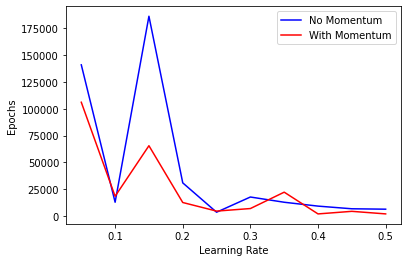

In [7]:
fig = plt.figure()
ax = plt.axes()
x_data = [d[0] for d in data]
y_nm = [d[1] for d in data]
y_m = [d[2] for d in data]
ax.plot(x_data, y_nm, '-b', label='No Momentum')
ax.plot(x_data, y_m, '-r', label='With Momentum')
plt.xlabel('Learning Rate')
plt.ylabel('Epochs')
plt.legend(loc="upper right")


The plot above shows that for most cases, momentum helps improve the speed of learning for this algorithm. In some cases, using momentum takes longer. This may be due to momentum overshooting the minimum error. The likelihood of this occurring probably increases as the learning rate increases.